# Закрепление знаний по визуализации данных в Python

Даны данные об оттоке клиентов в некотором банке.

Цель - выявить причины и закономерности в оттоке клиентов. Нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv')
display(churn_data.head())

churn_data.drop('RowNumber', axis=1, inplace=True) #убираем лишний столбец

print('Размер таблицы:', churn_data.shape)
print('Количество уникальных ID клиентов (проверка на некорректные данные):', churn_data['CustomerId'].nunique())
print('Возможные значения количества услуг банка:', churn_data['NumOfProducts'].nunique())
print('Количество уникальных значений стран: ', churn_data['Geography'].nunique())

churn_data['Exited'] = churn_data['Exited'].apply(lambda x: "Лояльные" if x == 0 else "Ушедшие") #заменим 0 и 1 на слова для понятности


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Размер таблицы: (10000, 13)
Количество уникальных ID клиентов (проверка на некорректные данные): 10000
Возможные значения количества услуг банка: 4
Количество уникальных значений стран:  3


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

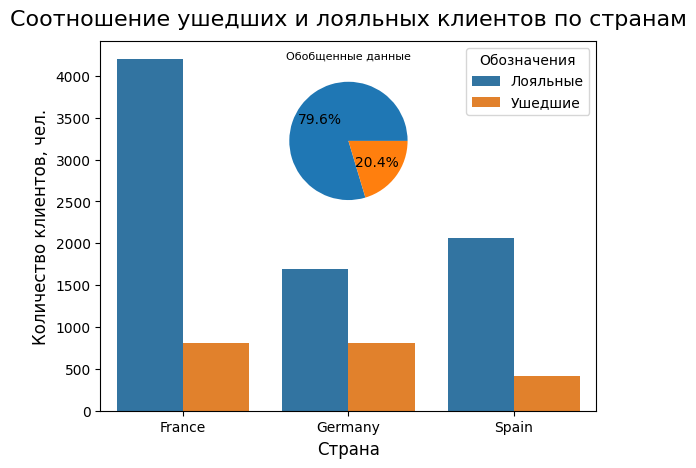

In [2]:
fig, ax = plt.subplots()

#Обобщенные данные по всем странам в виде круговой диаграммы 
exited_sum = churn_data['Exited'].value_counts().sort_values(ascending=False)
exited_pie = ax.inset_axes([0.3, 0.53, 0.4, 0.4])
exited_pie.pie(
    exited_sum,
    autopct='%1.1f%%'
)
exited_pie.set_title('Обобщенные данные', fontsize=8)
exited_pie.tick_params(labelsize=8)

#Данные по странам в виде столбчатой диаграммы
geo_groups = churn_data.groupby(by='Geography',as_index=False)['Exited'].value_counts()

ax = sns.barplot(
    data=geo_groups,
    x='Geography',
    y='count',
    hue='Exited'
)
ax.set_title('Соотношение ушедших и лояльных клиентов по странам', fontsize=16, y=1.02)
ax.set_xlabel('Страна', fontsize=12)
ax.set_ylabel('Количество клиентов, чел.', fontsize=12)
ax.legend(title='Обозначения');

Вывод: из диаграмм видно, что отток по всем странам в совокупности составляет 20.4%, при этом наименьший отток наблюдается во Франции (если учитывать количество лояльных клиентов), а вот в Германии отток, если сравнивать с количеством лояльных клиентов, наибольший, что требует дополнительного исследования. 

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

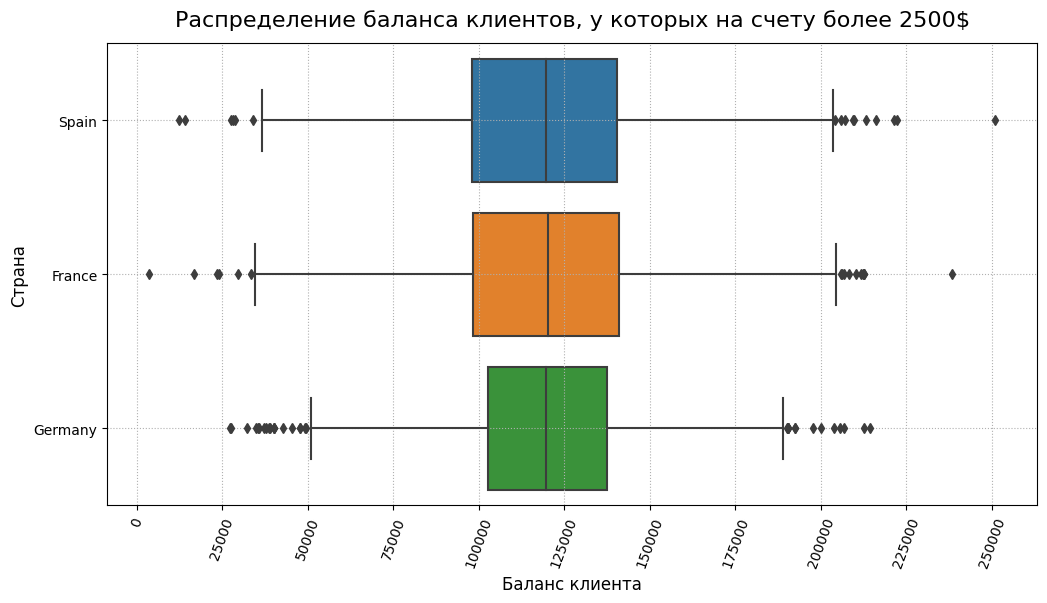

In [3]:
rich_client = churn_data[(churn_data['Balance'] >= 2500.0)]

fig = plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(
    data=rich_client,
    x='Balance',
    y='Geography'
)
boxplot.set_title('Распределение баланса клиентов, у которых на счету более 2500$', fontsize=16, y=1.02)
boxplot.set_xlabel('Баланс клиента', fontsize=12)
boxplot.set_ylabel('Страна', fontsize=12)
boxplot.tick_params(axis='x',rotation=70)
boxplot.xaxis.set_major_locator(ticker.MultipleLocator(25000))
boxplot.grid(linestyle=':');


Вывод: медианное значение распределения баланса богатых клиентов во всех странах практически одинаковое и примерно равно 120 000 долларов, то есть половина богатых клиентов имеет сумму 120 000. Для всех стран есть выбросы, но больше всего их для Германии, что требует дополнительного исследования, при этом в Германии межквартильный размах и границы распределения наименьшие из всех стран, что говорит о меньшей разнице в балансах группы богатых клиентов, в отличии от Франции и Испании. В Германии мало клиентов с балансом меньше 50 000 и больше 190 000, а во Франции и Испании есть клиенты, у которых баланс менее 40000 и более 200 000. 75% клиентов во всех странах имеют баланс выше 100 000$, при этом в Германии процент таких клиентов меньше, чем в Испании или Франции.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

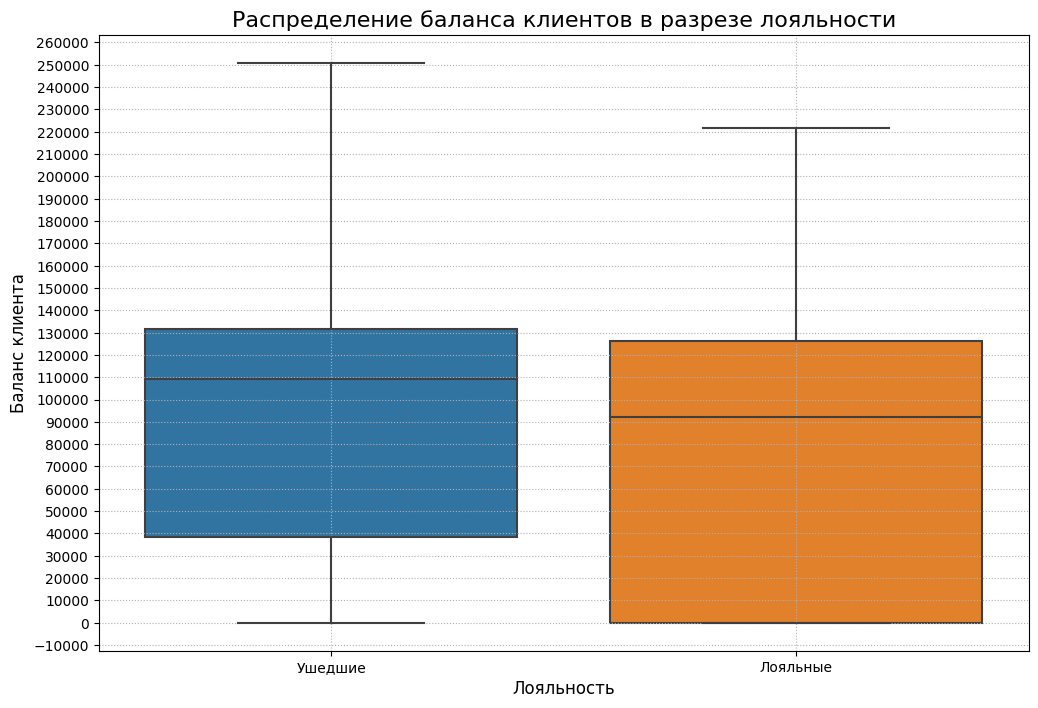

In [4]:
fig = plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(
    data=churn_data,
    x='Exited',
    y='Balance'
)
boxplot.set_title('Распределение баланса клиентов в разрезе лояльности', fontsize=16)
boxplot.set_xlabel('Лояльность', fontsize=12)
boxplot.set_ylabel('Баланс клиента', fontsize=12)
boxplot.yaxis.set_major_locator(ticker.MultipleLocator(10000))
boxplot.grid(linestyle=':');

Вывод: из графика видно, что 75% лояльных клиентов имеют баланс ниже 130 000 долларов, что не сильно отличается от баланса 75% ушедших клиентов. А вот 25% ушедших клиентов имеют баланс от 130 000 до 250 000, тогда как для лояльных этот диапазон 125 000 и 225 000 соответственно. Также половина ушедших клиентов имеет на счету не менее 110 000 долларов, а у лояльных клиентов половина имеет на счету 90 000. Это говорит о том, что чаще уходят богатые клиенты, значит условия для держателей больших вкладов не такие выгодные, как для держателей маленьких вкладов или нулевого баланса (25% лояльных клиентов имеют на счету 0 долларов).

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

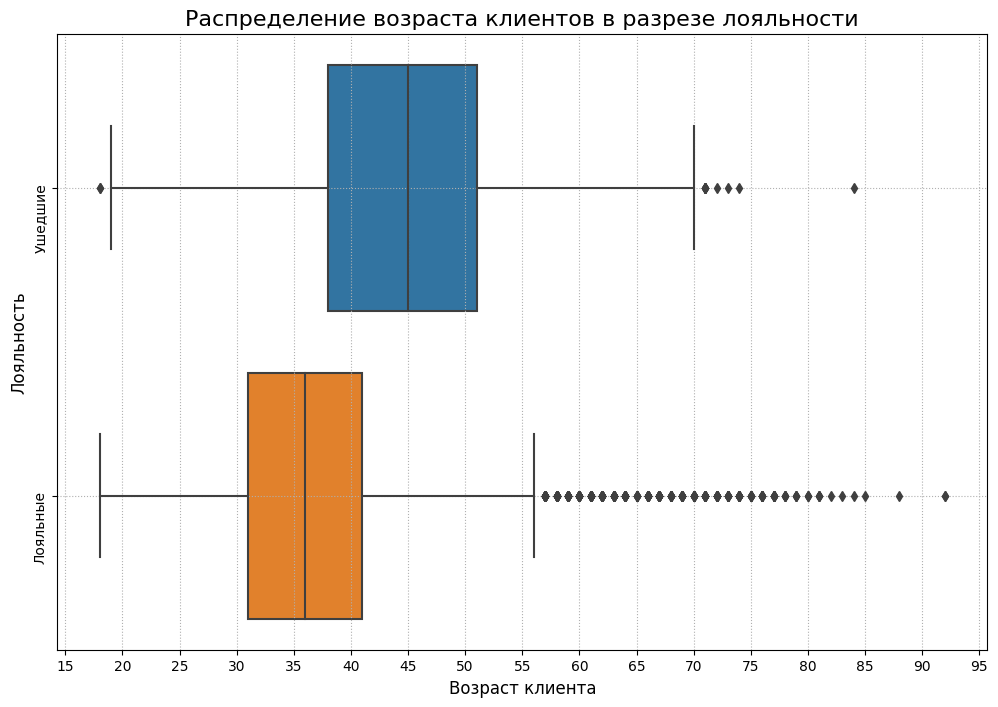

In [5]:
fig = plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(
    data=churn_data,
    x='Age',
    y='Exited'
)
boxplot.set_title('Распределение возраста клиентов в разрезе лояльности', fontsize=16)
boxplot.set_xlabel('Возраст клиента', fontsize=12)
boxplot.tick_params(axis='y',rotation=90)
boxplot.set_ylabel('Лояльность', fontsize=12)
boxplot.xaxis.set_major_locator(ticker.MultipleLocator(5))
boxplot.grid(linestyle=':');

Вывод: можно заметить, что 50% лояльных клиентов имеют возраст 36 лет и младше, а 50% ушедших от 45 лет и младше, при этом максимальный возраст лояльных клиентов составляет 56 лет, тогда как 25% от ушедших составляют люди в возрасте от 51 до 70 лет. Можно сделать вывод, что для клиентов старшего поколения банк предлагает менее выгодные условия, чем для молодых клиентов.